# Eager execution
`tf` eager execution evalutes operations immediately w/o *making a computational graph and run later*.

In [ ]:
import os 
import tensorflow as tf
import cProfile

In [ ]:
tf.executing_eagerly()

True

## Eager Exexution Basics 

In [ ]:
x = [[2.]]
m = tf.matmul(x,x)
print("m value after tf.matmul is: {}".format(m))
print("The type of m is: ", type(m))

m value after tf.matmul is: [[4.]]
The type of m is:  <class 'tensorflow.python.framework.ops.EagerTensor'>


In [ ]:
x = tf.constant([
                [1,2],
                 [3,4], 
])
print(x)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


In [ ]:
y = x+1
print(y)
y = tf.add(x, tf.constant([[4,3],[2,1]]))
print(y)

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[5 5]
 [5 5]], shape=(2, 2), dtype=int32)


## Eager Training

During eager execution, can use `tf.GradientTape` to trace operations for computing gradients later.<br>
Operations can occur during each call, all forward-pass operations get recorded to a **"tape"**. `To compute the gradient, play the tape backwards and then discard`.

In [ ]:
w = tf.Variable([2.0])
with tf.GradientTape() as tape:
    loss = w * w

In [ ]:
tape.gradient(loss,w)

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([4.], dtype=float32)>

A a multi-layer MNIST digits

In [ ]:
# Fetch and format the mnist data
(mnist_images, mnist_labels), _ = tf.keras.datasets.mnist.load_data()

dataset = tf.data.Dataset.from_tensor_slices(
  (tf.cast(mnist_images[...,tf.newaxis]/255, tf.float32),
   tf.cast(mnist_labels,tf.int64)))
dataset = dataset.shuffle(100).batch(32)

In [ ]:
# Build the model
mnist_model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(16,[4,4], activation='relu', input_shape=(None,28,1)),
  tf.keras.layers.Conv2D(16,[3,3], activation='relu'),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(10)
])
mnist_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, None, 25, 16)      272       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, None, 23, 16)      2320      
_________________________________________________________________
global_average_pooling2d_10  (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                170       
Total params: 2,762
Trainable params: 2,762
Non-trainable params: 0
_________________________________________________________________


In [ ]:
dataset.take(1)

<TakeDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int64)>

In [ ]:
for images,labels in dataset.take(1):
  print("Logits: ", mnist_model(images[0:1]).numpy())

Logits:  [[ 0.044005   -0.0445735  -0.03566688 -0.00219032  0.02094713 -0.08744129
  -0.03646804 -0.07307687 -0.00136107  0.01177069]]


In [ ]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_history = []

In [ ]:
def train_step(images, labels):
  with tf.GradientTape() as tape:
    logits = mnist_model(images, training=True)
    
    # Add asserts to check the shape of the output.
    tf.debugging.assert_equal(logits.shape, (32, 10))
    
    loss_value = loss_object(labels, logits)

  loss_history.append(loss_value.numpy().mean())
  grads = tape.gradient(loss_value, mnist_model.trainable_variables)
  optimizer.apply_gradients(zip(grads, mnist_model.trainable_variables))

In [ ]:
def train(epochs):
  for epoch in range(epochs):
    for (batch, (images, labels)) in enumerate(dataset):
      train_step(images, labels)
    print ('Epoch {} finished'.format(epoch))

In [ ]:
train(epochs = 3)

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished


In [ ]:
import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.xlabel('Batch #')
plt.ylabel('Loss [entropy]')

## To Be Continued


# TensorFlow Tensors and Variables
`dtype` is a uniform type that a tensor has. A tensor is like `np.arrays`. <br>
Variables are created by `tf.Variable` class. It is a tensor whose value can be changed by ops. Even `tf.keras` uses `tf.Variables` to function *(parameter storage)*.

In [ ]:
import tensorflow as tf
import numpy as np

## Tensors


In [ ]:
rank_0_tensor = tf.constant(256)
rank_2_tensor = tf.constant([[1, 2],
                             [3, 4],
                             [5, 6]], dtype=tf.float16)
print(rank_0_tensor,"\n", rank_2_tensor)

tf.Tensor(256, shape=(), dtype=int32) 
 tf.Tensor(
[[1. 2.]
 [3. 4.]
 [5. 6.]], shape=(3, 2), dtype=float16)


In [ ]:
rank_3_tensor = tf.constant([ # this is the first dimension
    [                         # this is the second dimension
        [                     # this is the 3rd dimension
            0, 1, 2, 3, 4
        ],
        [5, 6, 7, 8, 9]
     ],
    [[10, 11, 12, 13, 14],
    [15, 16, 17, 18, 19]],
    [[20, 21, 22, 23, 24],
    [25, 26, 27, 28, 29]],
   ])
                    
print(rank_3_tensor)

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]], shape=(3, 2, 5), dtype=int32)


The followings are A `scalar`( [ ] ), `vector`( [ 3 ] ), and `tensor`( [ 3,2 ] ): <br>
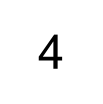
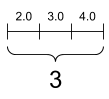
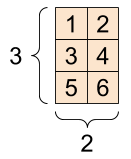<br>
For a `3-axis tensor` ( [ 3,2,5 ] ): <br>
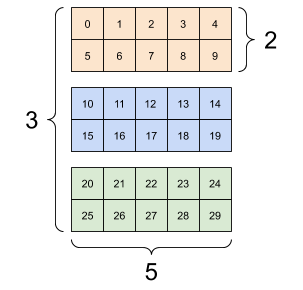
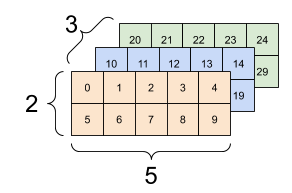
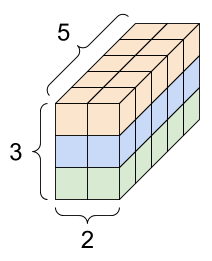 <br>
***Note**: Figure credit to Google TensorFlow Team

For a vector with `rank of 4`<br>
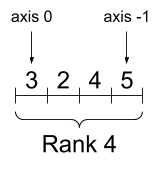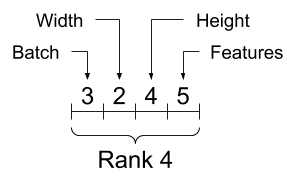

In [ ]:
mo# There are a lot of operations
np.array(rank_3_tensor) == rank_3_tensor.numpy()

array([[[ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True]],

       [[ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True]],

       [[ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True]]])

In [ ]:
a, b = tf.constant([[1,2],[3,4]]), tf.constant([[1,1],[1,1]])
print(tf.add(a, b), "\n")
print(tf.multiply(a, b), "\n")
print(tf.matmul(a, b), "\n")

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32) 



In [ ]:
print(a + b, "\n") # element-wise addition
print(a * b, "\n") # element-wise multiplication
print(a @ b, "\n") # matrix multiplication

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32) 



In [ ]:
c = tf.constant([[4.0, 5.0], [10.0, 1.0]])
# Find the largest value
print(tf.reduce_max(c))
# Find the index of the largest value
print(tf.argmax(c))
# Compute the softmax
print(tf.nn.softmax(c))

tf.Tensor(10.0, shape=(), dtype=float32)
tf.Tensor([1 0], shape=(2,), dtype=int64)
tf.Tensor(
[[2.6894143e-01 7.3105860e-01]
 [9.9987662e-01 1.2339458e-04]], shape=(2, 2), dtype=float32)
